In [1]:
#EP PS4 Q5

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.ndimage.filters import convolve1d

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

### a and b: insert image of page


### part c: begin with image derivation of cos whatever

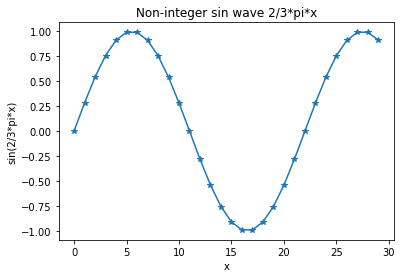

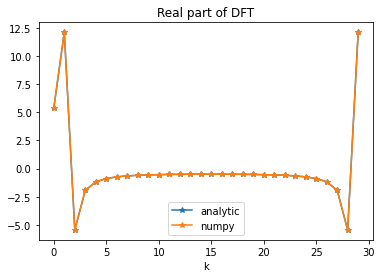

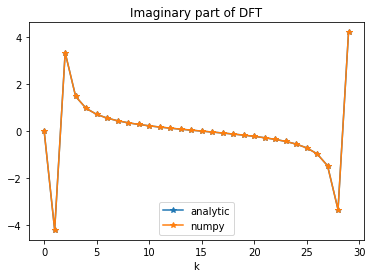

maximum difference in real and imaginary parts between analytic dft and numpy dft: 
7.105427357601002e-14 4.085620730620576e-14


In [3]:
#PART C
N = 30 #how many points do we want
wo = 1/11*np.pi #control non integer period

#generate non integer sin wave
x = np.linspace(0, N-1, N)
y = np.sin(wo*x)

#calculate DFT
ydft = np.zeros(N)
k = np.linspace(0, N-1, N)
ydft = 1/(2*1j)*( 1 - np.exp( -1j*(2*np.pi*k - wo*N))) / ( 1 -  np.exp( -1j*(2*np.pi*k/N - wo))) \
        - 1/(2*1j)*( 1 - np.exp( -1j*(2*np.pi*k + wo*N))) / ( 1 -  np.exp( -1j*(2*np.pi*k/N + wo)))

#calculate DFT with numpy
ydft_np = np.fft.fft(y)

mpl.figure()
mpl.plot(x, y, '*-')
mpl.title('Non-integer sin wave 2/3*pi*x')
mpl.xlabel('x')
mpl.ylabel('sin(2/3*pi*x)')
mpl.show()

mpl.figure()
mpl.plot(np.real(ydft), '*-')
mpl.plot(np.real(ydft_np), '*-')
mpl.title('Real part of DFT')
mpl.legend(['analytic', 'numpy'])
mpl.xlabel('k')
mpl.show()

mpl.figure()
mpl.plot(np.imag(ydft), '*-')
mpl.plot(np.imag(ydft_np), '*-')
mpl.title('Imaginary part of DFT')
mpl.legend(['analytic', 'numpy'])
mpl.xlabel('k')
mpl.show()

print('maximum difference in real and imaginary parts between analytic dft and numpy dft: ')
print(max(np.abs(np.real(ydft - ydft_np))), max(np.abs(np.imag(ydft - ydft_np))))

We see that the analytic DFT and numpy's DFT are very close, within the range of some machine precision errors in the calculation.

A pure sine wave should be a delta function (or two, one in negative frequencies as well, here wrapped around), and here we can see that is not the case. There is spectral leakage that substantially affects the surrounding points, and we can see nearly all of the points have nonzero values and a slight curve that should not be there.

### PART D

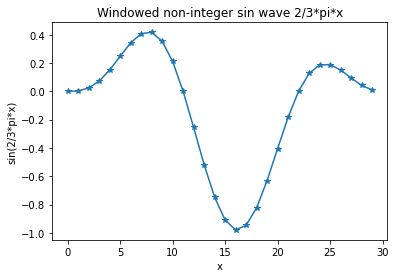

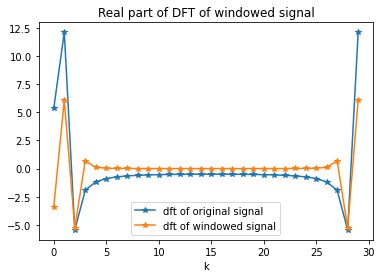

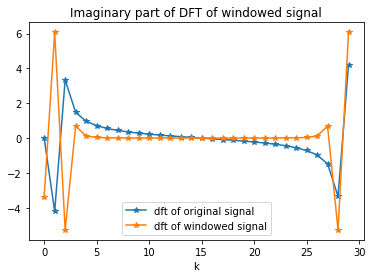

In [4]:
#PART D - window and rerun

#create window and dft of window
win = 0.5-0.5*np.cos(2*np.pi*x/N)
windft = np.fft.fft(win)

# #convolve fft of window with fft of y : same as time domain multiplication
#buuuut doesn't seem to want to work. convolution has discontinuities and is super long
ydft_win = np.convolve(ydft, windft, 'same')
# ydft_win_re = convolve1d(np.real(ydft), np.real(windft), mode='wrap')
# ydft_win_im = convolve1d(np.imag(ydft), np.imag(windft), mode='wrap')
# ydft_win = ydft_win_re + 1j*ydft_win_im

#calculate DFT with numpy using signal windowed in time domain
y_win = y*win
ydft_win_np = np.fft.fft(y_win)

mpl.figure()
mpl.plot(x, y_win, '*-')
mpl.title('Windowed non-integer sin wave 2/3*pi*x')
mpl.xlabel('x')
mpl.ylabel('sin(2/3*pi*x)')
mpl.show()

mpl.figure()
# mpl.plot(np.real(ydft_win), '*-')
mpl.plot(np.real(ydft_np), '*-')
mpl.plot(np.real(ydft_win_np), '*-')
mpl.title('Real part of DFT of windowed signal')
# mpl.legend(['analytic', 'numpy'])
mpl.legend(['dft of original signal', 'dft of windowed signal'])
mpl.xlabel('k')
mpl.show()

mpl.figure()
# mpl.plot(np.imag(ydft_win), '*-')
mpl.plot(np.imag(ydft_np), '*-')
mpl.plot(np.real(ydft_win_np), '*-')
mpl.title('Imaginary part of DFT of windowed signal')
mpl.legend(['dft of original signal', 'dft of windowed signal'])
# mpl.legend(['analytic', 'numpy'])
mpl.xlabel('k')
mpl.show()

# print('maximum difference in real and imaginary parts between analytic dft and numpy dft: ')
# print(max(np.abs(np.real(ydft_win - ydft_win_np))), max(np.abs(np.imag(ydft_win - ydft_win_np))))

Here we can see that the windowed function is much closer to the delta function. Many more of the points are sitting at zero where they should be, and fewer of the points to the sides of where the delta function should be are affected.

### PART E

Insert page of derivations here.

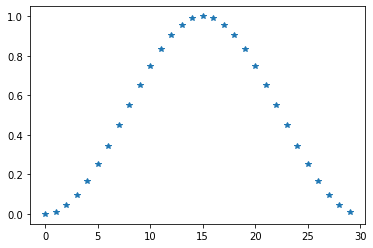

/home/elizabeth/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


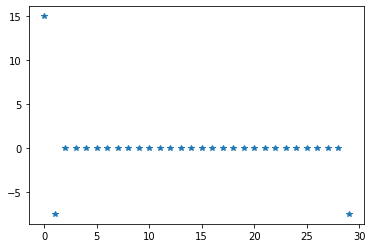

In [5]:
#take FFT of window for sanity check
windft = np.fft.fft(win)

mpl.figure()
mpl.plot(x, win, '*')
mpl.show()

mpl.figure()
mpl.plot(x, windft, '*')
mpl.show()

This matches the analytical derivation, where we see at k=0 a spike of N/2, and at k = 1 and k=-1 a spike of -N/4. Because windowing winds up being a convolution in the frequency domain, we find each windowed point will be the sum of 1/2 of itself, subtracted by 1/4 times its neighbours to either side, corresponding to these spikes.

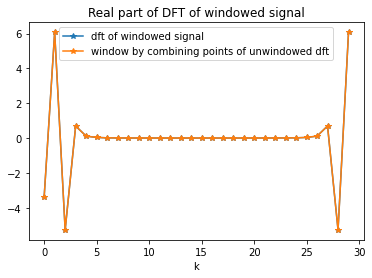

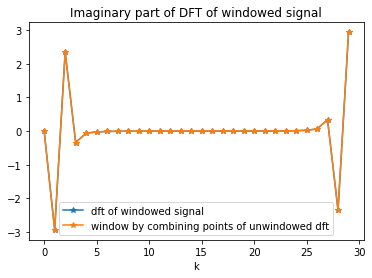

maximum difference in real and imaginary parts between two windowing methods: 
4.796163466380676e-14 1.8207657603852567e-14


In [6]:
#use information learned from DFT of window to show that you can window the DFT by combining points
test_windowing = np.zeros(N, dtype=complex)
for ii in range(0, N):
    #combine points as shown by DFT of window: 1/2 of itself, -1/4 of points to either side
    #use modulus to give the wraparound...
    #this is really just kind of a circular convolution of ydft and the window dft.
    test_windowing[ii] = 1/2*ydft[ii] - 1/4*ydft[np.mod(ii-1, N)] - 1/4*ydft[np.mod(ii+1, N)]

mpl.figure()
mpl.plot(np.real(ydft_win_np), '*-')
mpl.plot(np.real(test_windowing), '*-')
mpl.title('Real part of DFT of windowed signal')
mpl.legend(['dft of windowed signal', 'window by combining points of unwindowed dft'])
mpl.xlabel('k')
mpl.show()

mpl.figure()
mpl.plot(np.imag(ydft_win_np), '*-')
mpl.plot(np.imag(test_windowing), '*-')
mpl.title('Imaginary part of DFT of windowed signal')
mpl.legend(['dft of windowed signal', 'window by combining points of unwindowed dft'])
mpl.xlabel('k')
mpl.show()

print('maximum difference in real and imaginary parts between two windowing methods: ')
print(max(np.abs(np.real(ydft_win_np - test_windowing))), max(np.abs(np.imag(ydft_win_np - test_windowing))))

As we can see, combining the points of the DFT as the windowing DFT suggests provides the same as windowing in the time domain and taking the FFT of the windowed time domain signal.